# Question 1: PCA

Perform the Principle component analysis of the training dataset where each snapshot (i.e., image) is considered as a sample. Use the principle component for data compressing and decompressing.

Reference: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [59]:
# load in training dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils import load_videos

In [100]:
# Load the training set
videos, video_labels = load_videos('./VIDEOS/training/')

Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive

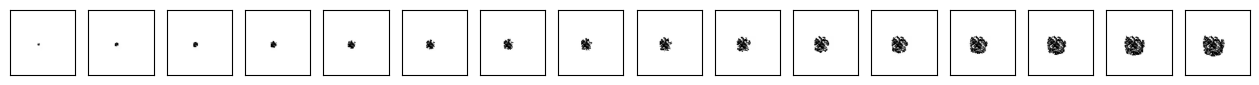

In [101]:
# show the frames in an example video
example_video = videos[0]
no_frames, width, height = example_video.shape
fig, ax = plt.subplots(nrows=1, ncols=no_frames, figsize=(16, 9))

for i in range(no_frames):
  ax[i].imshow(example_video[i], cmap='binary')

  ax[i].set_xticks([])
  ax[i].set_yticks([])

## PCA Compression & Decompression

I will apply PCA to an example video (i.e. 16 frames) with three different levels of compression. For each level of compression, I will present the original 16 frames of the video, then the reconstructed frames after compression / decompression. I will also plot the amount of information each component represents for each frame.

### 1 Component

Explained variance of principal component for frame 0: 88.64%
Explained variance of principal component for frame 1: 88.42%
Explained variance of principal component for frame 2: 86.23%
Explained variance of principal component for frame 3: 83.98%
Explained variance of principal component for frame 4: 79.73%
Explained variance of principal component for frame 5: 77.03%
Explained variance of principal component for frame 6: 75.39%
Explained variance of principal component for frame 7: 73.31%
Explained variance of principal component for frame 8: 70.27%
Explained variance of principal component for frame 9: 68.06%
Explained variance of principal component for frame 10: 66.09%
Explained variance of principal component for frame 11: 66.83%
Explained variance of principal component for frame 12: 67.79%
Explained variance of principal component for frame 13: 67.6%
Explained variance of principal component for frame 14: 68.16%
Explained variance of principal component for frame 15: 67.64%


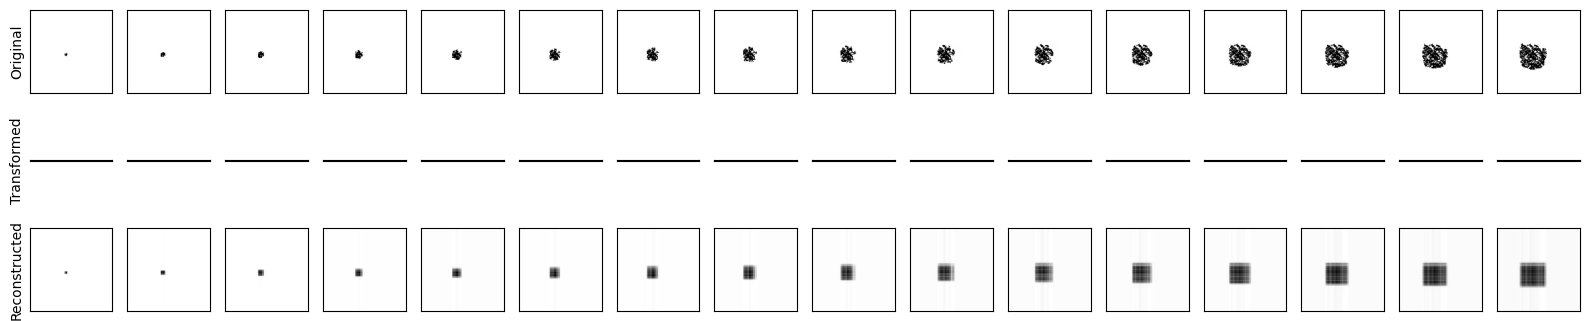

In [131]:
# three rows in figure: top is original, middle is compressed, bottom is reconstructed
fig, ax = plt.subplots(nrows=3, ncols=no_frames, figsize=(16, 4))

for i in range(no_frames):
  # get the original frame
  original_frame = example_video[i]

  # fit the pca model to the real video frame
  pca = PCA(n_components=1)
  pca.fit(original_frame)

  # get the compressed and decompressed frames
  transformed_frame = pca.transform(original_frame)
  reconstructed_frame = pca.inverse_transform(transformed_frame)

  # show the original frame on the top, the compressed frame in the middle and the decompressed frame on the bottom
  ax[0, i].imshow(original_frame, cmap='binary')
  ax[1, i].imshow(transformed_frame.T, cmap='binary')
  ax[2, i].imshow(reconstructed_frame, cmap='binary')

  # keep track of each component's explained variance
  print(f"Explained variance of principal component for frame {i}: {round(pca.explained_variance_ratio_[0] * 100, 2)}%")

  # remove the x and y ticks
  ax[0, i].set_xticks([]), ax[0, i].set_yticks([]), ax[1, i].set_xticks([]), ax[1, i].set_yticks([]), ax[2, i].set_xticks([]), ax[2, i].set_yticks([])

rows = ['Original', 'Transformed', 'Reconstructed']
for axis, row in zip(ax[:,0], rows):
    axis.set_ylabel(row)

fig.tight_layout()
plt.show()

### 10 Components:

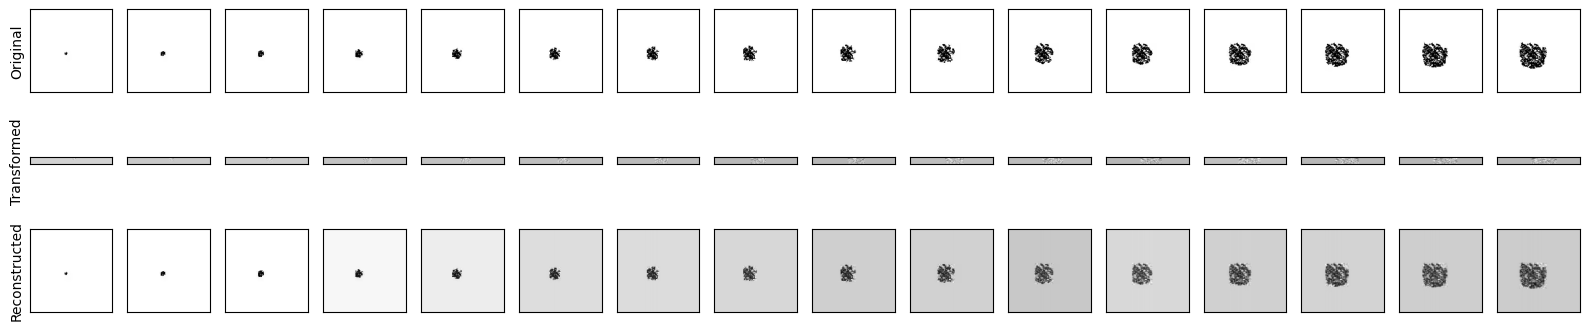

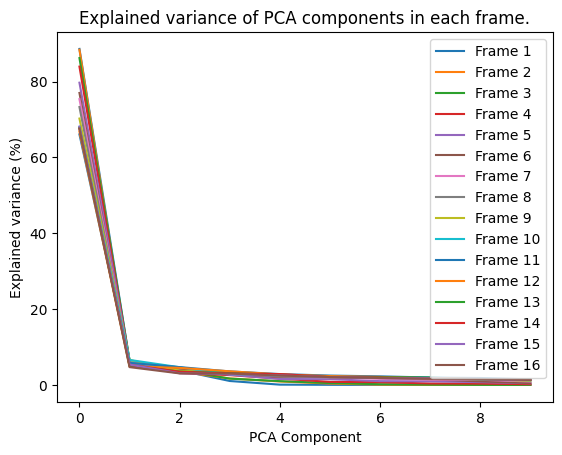

In [130]:
# three rows in figure: top is original, middle is compressed, bottom is reconstructed
fig, ax = plt.subplots(nrows=3, ncols=no_frames, figsize=(16, 4))
explained_variances = []

for i in range(no_frames):
  # get the original frame
  original_frame = example_video[i]

  # fit the pca model to the real video frame
  pca = PCA(n_components=10)
  pca.fit(original_frame)

  # get the compressed and decompressed frames
  transformed_frame = pca.transform(original_frame)
  reconstructed_frame = pca.inverse_transform(transformed_frame)

  # show the original frame on the top, the compressed frame in the middle and the decompressed frame on the bottom
  ax[0, i].imshow(original_frame, cmap='binary')
  ax[1, i].imshow(transformed_frame.T, cmap='binary')
  ax[2, i].imshow(reconstructed_frame, cmap='binary')
  
  # keep track of each component's explained variance
  explained_variances.append(pca.explained_variance_ratio_ * 100)

  # remove the x and y ticks
  ax[0, i].set_xticks([]), ax[0, i].set_yticks([]), ax[1, i].set_xticks([]), ax[1, i].set_yticks([]), ax[2, i].set_xticks([]), ax[2, i].set_yticks([])

rows = ['Original', 'Transformed', 'Reconstructed']
for axis, row in zip(ax[:,0], rows):
    axis.set_ylabel(row)

fig.tight_layout()
plt.show()

# plot the explained variances for each component
for i in range(len(explained_variances)):
  plt.plot(explained_variances[i], label=f"Frame {i + 1}")

plt.title("Explained variance of PCA components in each frame.")
plt.xlabel("PCA Component")
plt.ylabel("Explained variance (%)")
plt.legend()
plt.show()

### 50 Components:

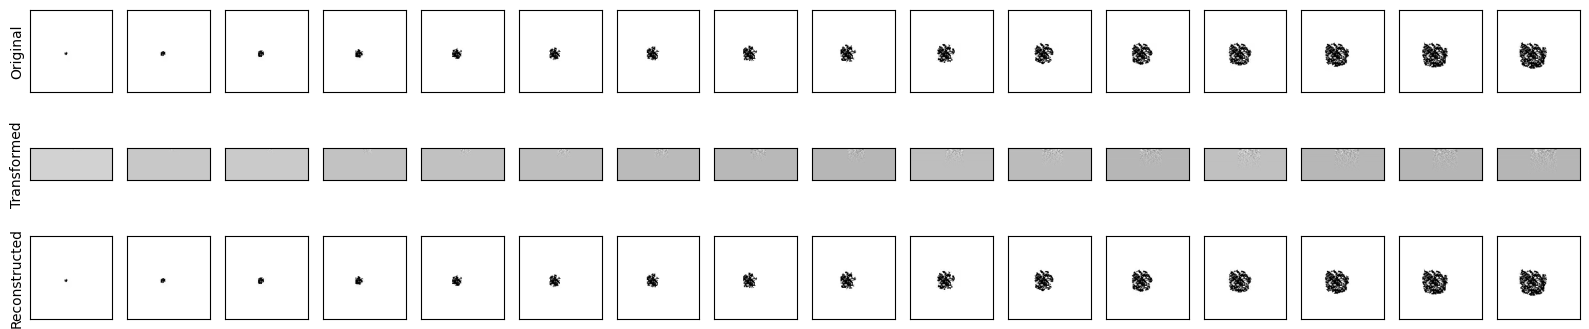

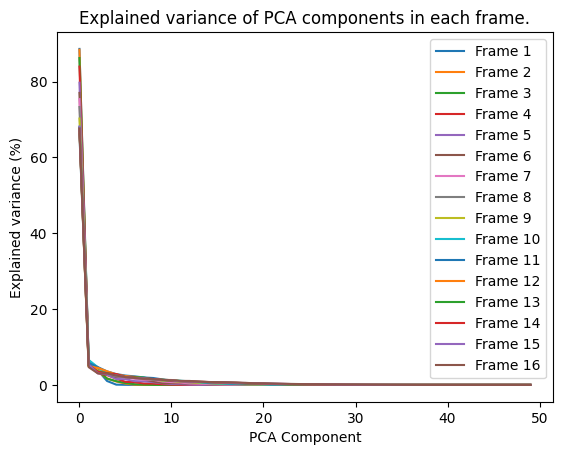

In [129]:
# three rows in figure: top is original, middle is compressed, bottom is reconstructed
fig, ax = plt.subplots(nrows=3, ncols=no_frames, figsize=(16, 4))
explained_variances = []

for i in range(no_frames):
  # get the original frame
  original_frame = example_video[i]

  # fit the pca model to the real video frame
  pca = PCA(n_components=50)
  pca.fit(original_frame)

  # get the compressed and decompressed frames
  transformed_frame = pca.transform(original_frame)
  reconstructed_frame = pca.inverse_transform(transformed_frame)

  # show the original frame on the top, the compressed frame in the middle and the decompressed frame on the bottom
  ax[0, i].imshow(original_frame, cmap='binary')
  ax[1, i].imshow(transformed_frame.T, cmap='binary')
  ax[2, i].imshow(reconstructed_frame, cmap='binary')

  # keep track of each component's explained variance
  explained_variances.append(pca.explained_variance_ratio_ * 100)

  # remove the x and y ticks
  ax[0, i].set_xticks([]), ax[0, i].set_yticks([]), ax[1, i].set_xticks([]), ax[1, i].set_yticks([]), ax[2, i].set_xticks([]), ax[2, i].set_yticks([])

rows = ['Original', 'Transformed', 'Reconstructed']
for axis, row in zip(ax[:,0], rows):
    axis.set_ylabel(row)

fig.tight_layout()
plt.show()

# plot the explained variances for each component
for i in range(len(explained_variances)):
  plt.plot(explained_variances[i], label=f"Frame {i + 1}")

plt.title("Explained variance of PCA components in each frame.")
plt.xlabel("PCA Component")
plt.ylabel("Explained variance (%)")
plt.legend()
plt.show()

### Reconstruction Error with Number of Components

I will now test the PCA reconstruction on the last frame of the example video for several different numbers of components and visualise how the total reconstruction error changes with number of components used.

Text(0.5, 1.0, 'Reconstruction Error of a Single Frame with Variable Number of Components.')

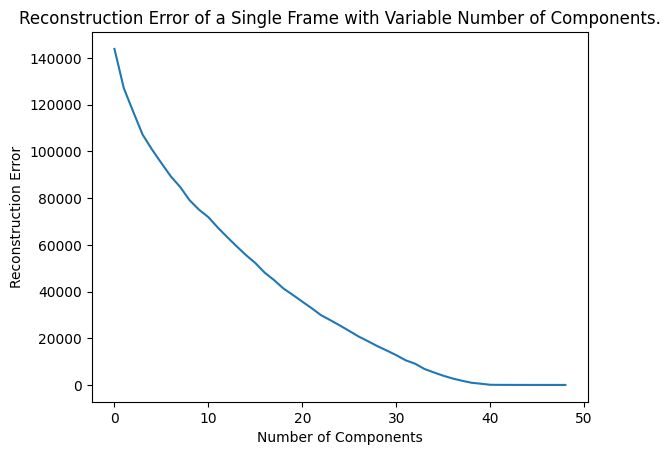

In [138]:
frame = example_video[-1]
reconstruction_errors = []

for n_components in range(1, 50):
   # fit the pca model to the real video frame
   pca = PCA(n_components=n_components)
   pca.fit(frame)

   # get the compressed and decompressed frames
   transformed_frame = pca.transform(frame)
   reconstructed_frame = pca.inverse_transform(transformed_frame)

   # calculate and store reconstruction error using absolute pixel-wise differences
   reconstruction_error = np.sum(np.abs(reconstructed_frame.flatten() - frame.flatten()))
   reconstruction_errors.append(reconstruction_error)

plt.plot(reconstruction_errors)
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error of a Single Frame with Variable Number of Components.")

### Reconstruction Error with Frame Content Complexity

I will now test the PCA reconstruction on all sixteen frames of the example video with fixed number of components = 1 (i.e. just the first principal component). The idea behind this is that as we go through the frames, their content becomes more complex - from a small dot in the center of the frame to a cloud of pixels by the final frame. Therefore, one would expect the reconstruction error to get worse as the frames carry on, as the complexity of the image that needs to be reconstructed becomes greater, and so just one principal component begins to struggle to represent the image fully.

Text(0.5, 1.0, 'Reconstruction Error of the First Principal Component over frames of increasing detail.')

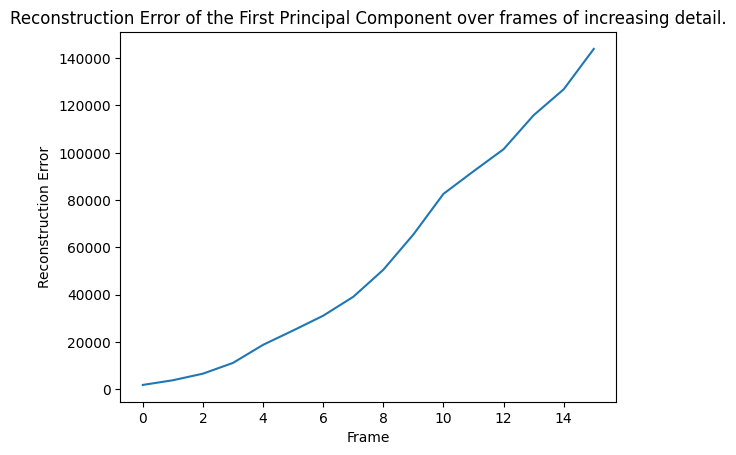

In [139]:
reconstruction_errors = []

for i in range(len(example_video)):
   # fit the pca model to the real video frame
   original_frame = example_video[i]

   pca = PCA(n_components=1)
   pca.fit(original_frame)

   # get the compressed and decompressed frames
   transformed_frame = pca.transform(original_frame)
   reconstructed_frame = pca.inverse_transform(transformed_frame)

   # calculate and store reconstruction error using absolute pixel-wise differences
   reconstruction_error = np.sum(np.abs(reconstructed_frame.flatten() - original_frame.flatten()))
   reconstruction_errors.append(reconstruction_error)

plt.plot(reconstruction_errors)
plt.xlabel("Frame")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error of the First Principal Component over frames of increasing detail.")

### PCA across the Training Set

Rather than just visualise PCA for one video, I will now perform PCA with one principal component for every frame in the training set, and record the average reconstruction error per frame of PCA across the entire training set by summing the absolute pixel-wise differences between the reconstructed frame and the original frame to get a total reconstruction error for each frame. Then, I will aggregate these reconstruction errors in several ways for later analysis and comparison.

In [148]:
video_mses = []
video_maes = []

# go through every video in the training set
for video in videos:
  frame_reconstruction_errors = []

  # go through every frame in each video
  for frame in video:
    # set up PCA with just the first principal component
    pca = PCA(n_components=1)
    pca.fit(frame)

    # compress and reconstruct
    transformed_frame = pca.transform(frame)
    reconstructed_frame = pca.inverse_transform(transformed_frame)

    # find the reconstruction error of this frame as the sum of the absolute pixel-wise differences between the original frame and the reconstructed frame
    reconstruction_error = np.sum(np.abs(reconstructed_frame.flatten() - frame.flatten()))
    frame_reconstruction_errors.append(reconstruction_error)

  # aggregate the reconstruction errors of this video's frames
  frame_reconstruction_errors = np.array(frame_reconstruction_errors)

  # 1. Mean Squared Error: the average of the squared errors across the frames
  mse = np.sum(np.square(frame_reconstruction_errors)) / len(frame_reconstruction_errors)
  video_mses.append(mse)

  # 2. Mean Average Error: the average of the absolute errors across the frames
  mae = np.sum(np.abs(frame_reconstruction_errors)) / len(frame_reconstruction_errors)
  video_maes.append(mae)

  # TODO PSNR, SSIM, etc.

video_mses = np.array(video_mses)
video_maes = np.array(video_maes)
average_mse = np.sum(video_mses) / len(video_mses)
average_mae = np.sum(video_maes) / len(video_maes)

In [149]:
print(f"Average mean squared error across all training videos: {average_mse}")
print(f"Average mean absolute error across all training videos: {average_mae}")

Average mean squared error across all training videos: 4818256160.78031
Average mean absolute error across all training videos: 50208.71406382001
